In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("heart.csv")
df.columns = df.columns.str.strip()
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Detect outliers

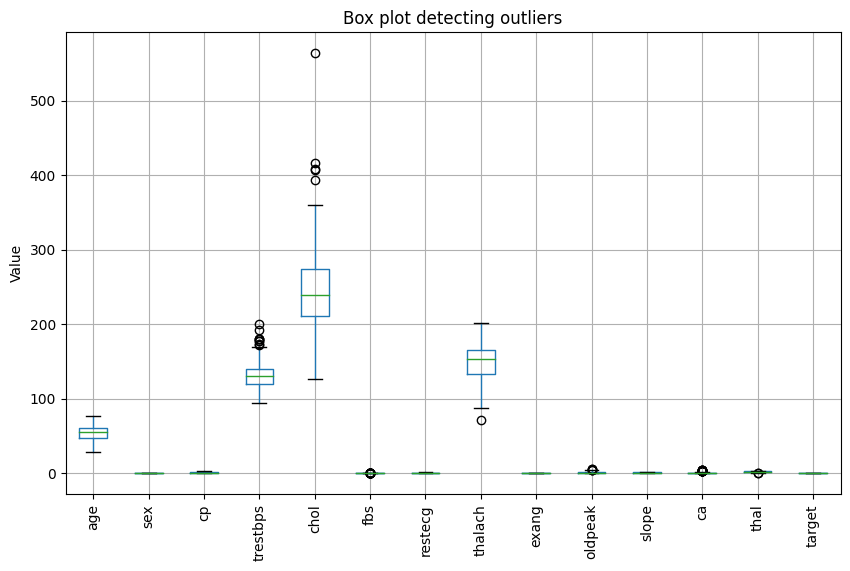

In [7]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title("Box plot detecting outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Remove outliers

In [8]:
#Remove outliers from numerical variables
z_scores = stats.zscore(df)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
Cleaned_data = df[~outliers.any(axis=1)]

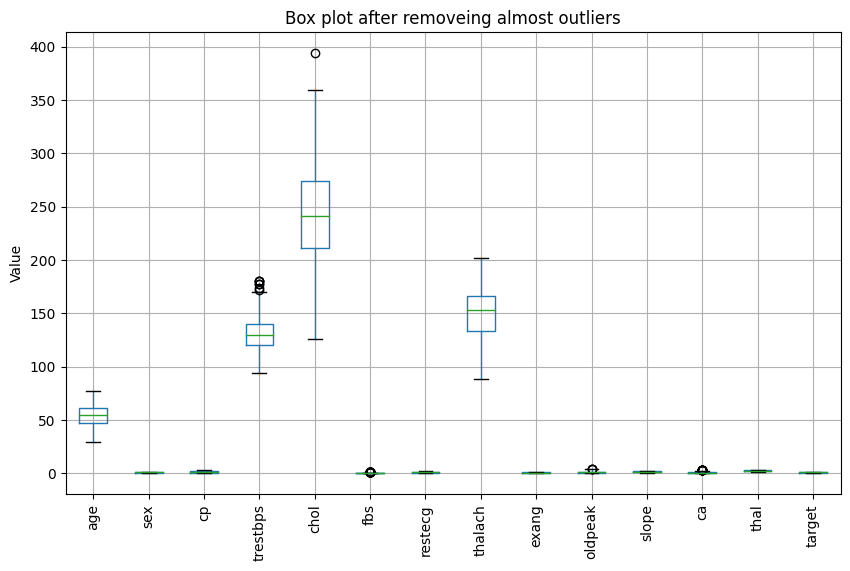

In [9]:
plt.figure(figsize=(10,6))
Cleaned_data.boxplot()
plt.title("Box plot after removeing almost outliers")
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [10]:
Cleaned_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Visualizing the distribution

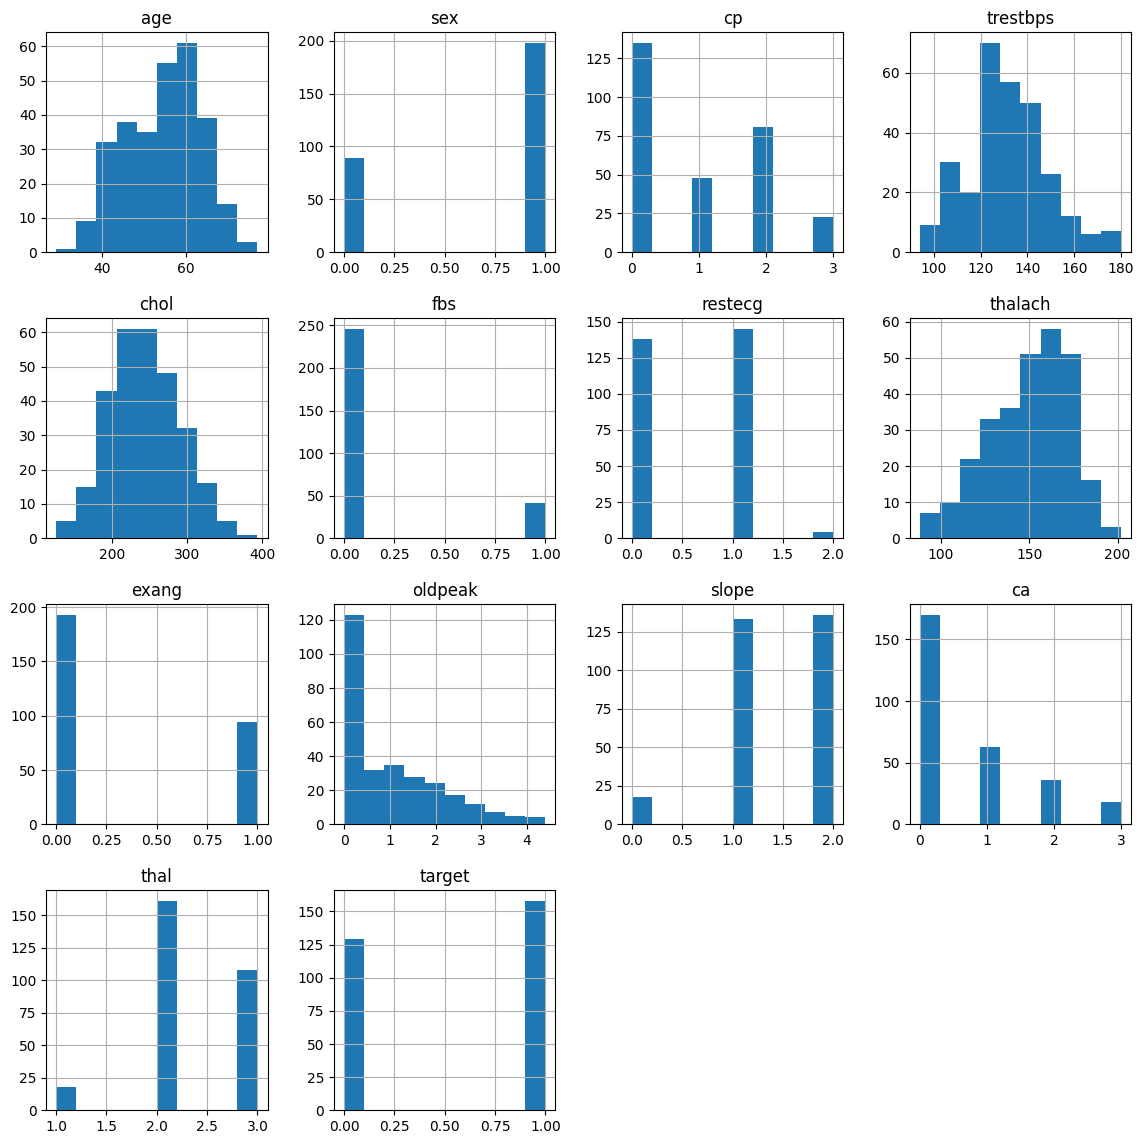

In [11]:
Cleaned_data.hist(figsize=(14,14))
plt.show()

### Visualize patient demographics

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
#count the number of patients for each gender
Gender_counts = df['sex'].value_counts()
chestpain_counts = df['cp'].value_counts()
patient_age = df['age'].value_counts()

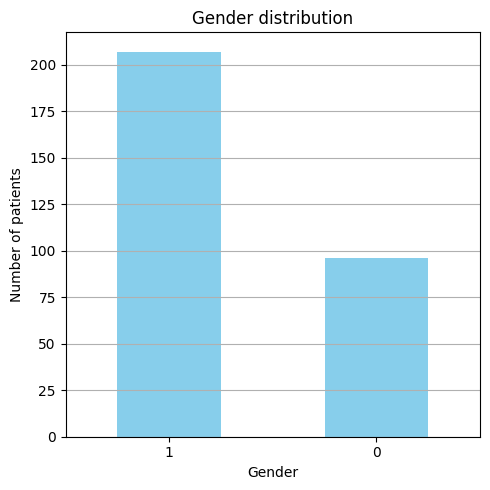

In [14]:
#Plot bar plots for each demographic Category
plt.figure(figsize=(5, 5))

#bar plot for gender distribution
Gender_counts.plot(kind='bar',color='skyblue')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.grid(axis='y')
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()


**This bar chart shows the number of people who have had a heart attack in this dataset,divided by gender.The Y-axis shows the number of patients, and the x-axis shows gender,labeled Male and Female**

```There are more males(175) then females(125) in this dataset who have had a heart attack```

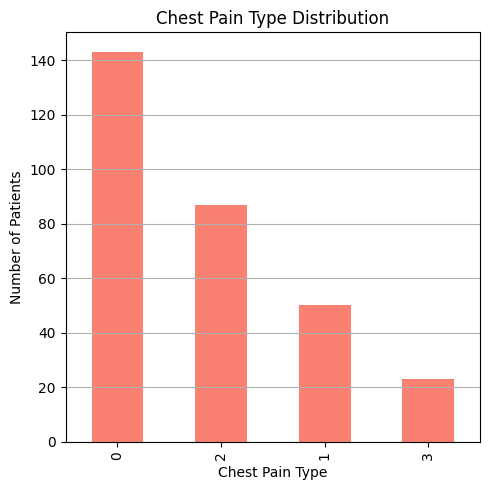

In [15]:
#bar plot for chest pain type distribution
plt.figure(figsize=(5, 5))
#plt.subplot(1, 3, 1)
chestpain_counts.plot(kind='bar',color='salmon')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**This bar chart shows the distribution of patients with chest pain according to chest pain type in a heart attack analysis dataset.The x-axis shows the chest pain type, which inclues level 0 to 3**

**The y-axis shows the number of patients.**

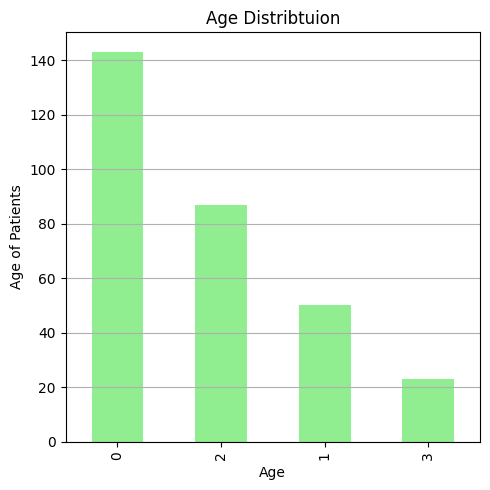

In [16]:
#bar plot for age distribution
plt.figure(figsize=(5, 5))
chestpain_counts.plot(kind='bar',color='lightgreen')
plt.title('Age Distribtuion')
plt.xlabel('Age')
plt.ylabel('Age of Patients')
plt.grid(axis='y')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**This bar chart shows the age distribution of people who have experienced a heart attack in this dataset.The x-axis shows age,and the y-axis shows the number of people.The age groups are binned into intervals of 10 years.**

**The y-axis starts at 0 and goes up to 140.The age group with the most heart attacks is 60-69 years old, with 120 people.There is a general trend of the number of attacks increasing as age increases,until the 60-69 age group.**

### Analyze health metrics such as Blood Sugar, cholesterol levels,Blood Pressure

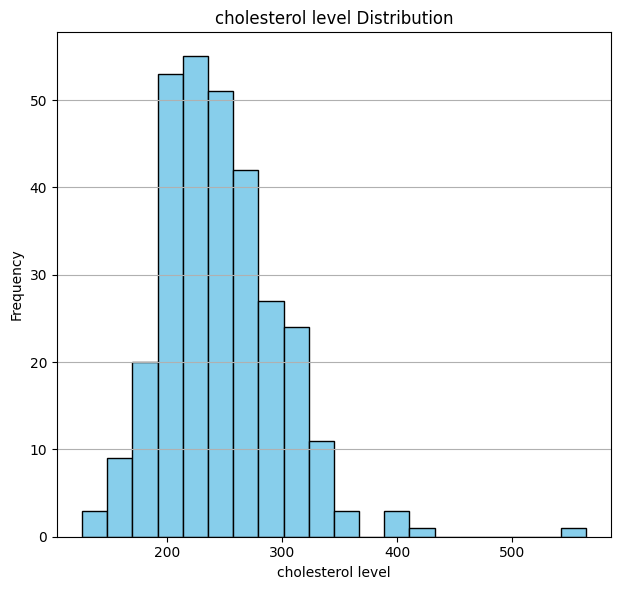

In [17]:
#Plot histograms for cholesterol levels 
plt.figure(figsize=(12,6))

#histogram for cholesterol levels
plt.subplot(1, 2, 2)
plt.hist(df['chol'], bins=20, color="skyblue", edgecolor='black')
plt.title('cholesterol level Distribution')
plt.xlabel("cholesterol level")
plt.grid(axis='y')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**This bar chart shows the distribution of the cholesterol level for patients.The x-axis shows blood sugar level, which appears to range from less than 90 to more than 200.The y-axis shows the number of patients.**

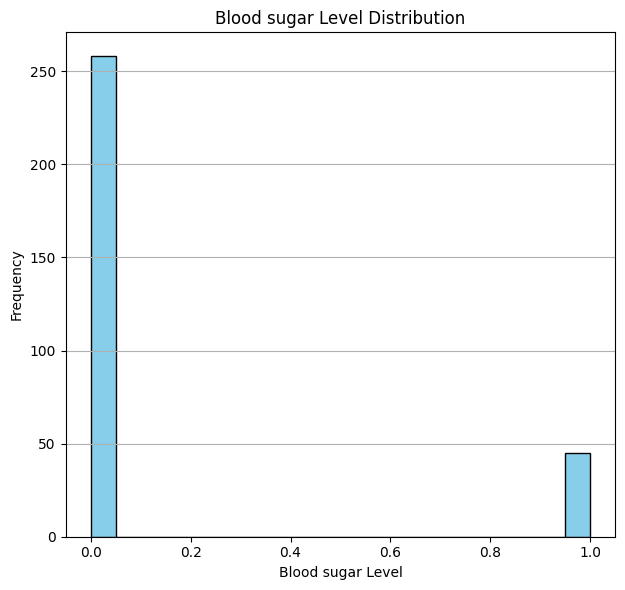

In [18]:
#Plot histograms for blood sugar levels 
plt.figure(figsize=(12,6))

#histogram for blood sugar levels
plt.subplot(1, 2, 2)
plt.hist(df['fbs'], bins=20, color="skyblue", edgecolor='black')
plt.title('Blood sugar Level Distribution')
plt.xlabel("Blood sugar Level")
plt.grid(axis='y')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

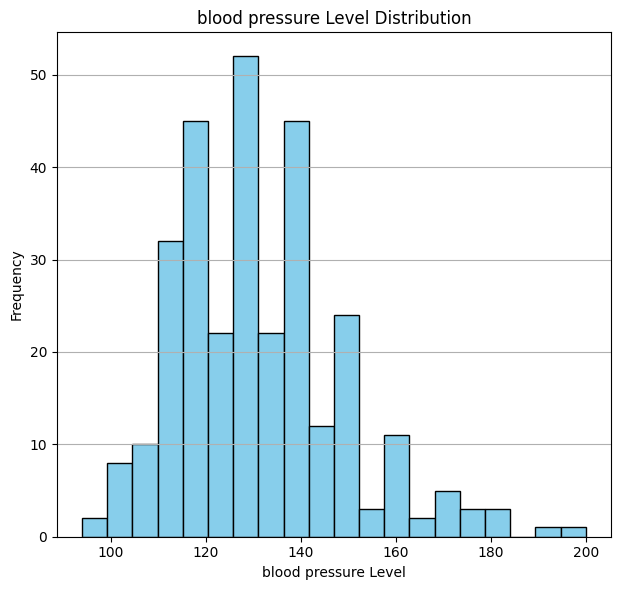

In [19]:
#Plot histograms for blood pressure levels 
plt.figure(figsize=(12,6))

#histogram for blood pressure levels
plt.subplot(1, 2, 2)
plt.hist(df['trestbps'], bins=20, color="skyblue", edgecolor='black')
plt.title('blood pressure Level Distribution')
plt.xlabel("blood pressure Level")
plt.grid(axis='y')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**This bar chart shows the distribution of blood pressure for patients.The x-axis shows different blood pressure levels and the y-axis shows the number of patients.**

### disease prevalence rates

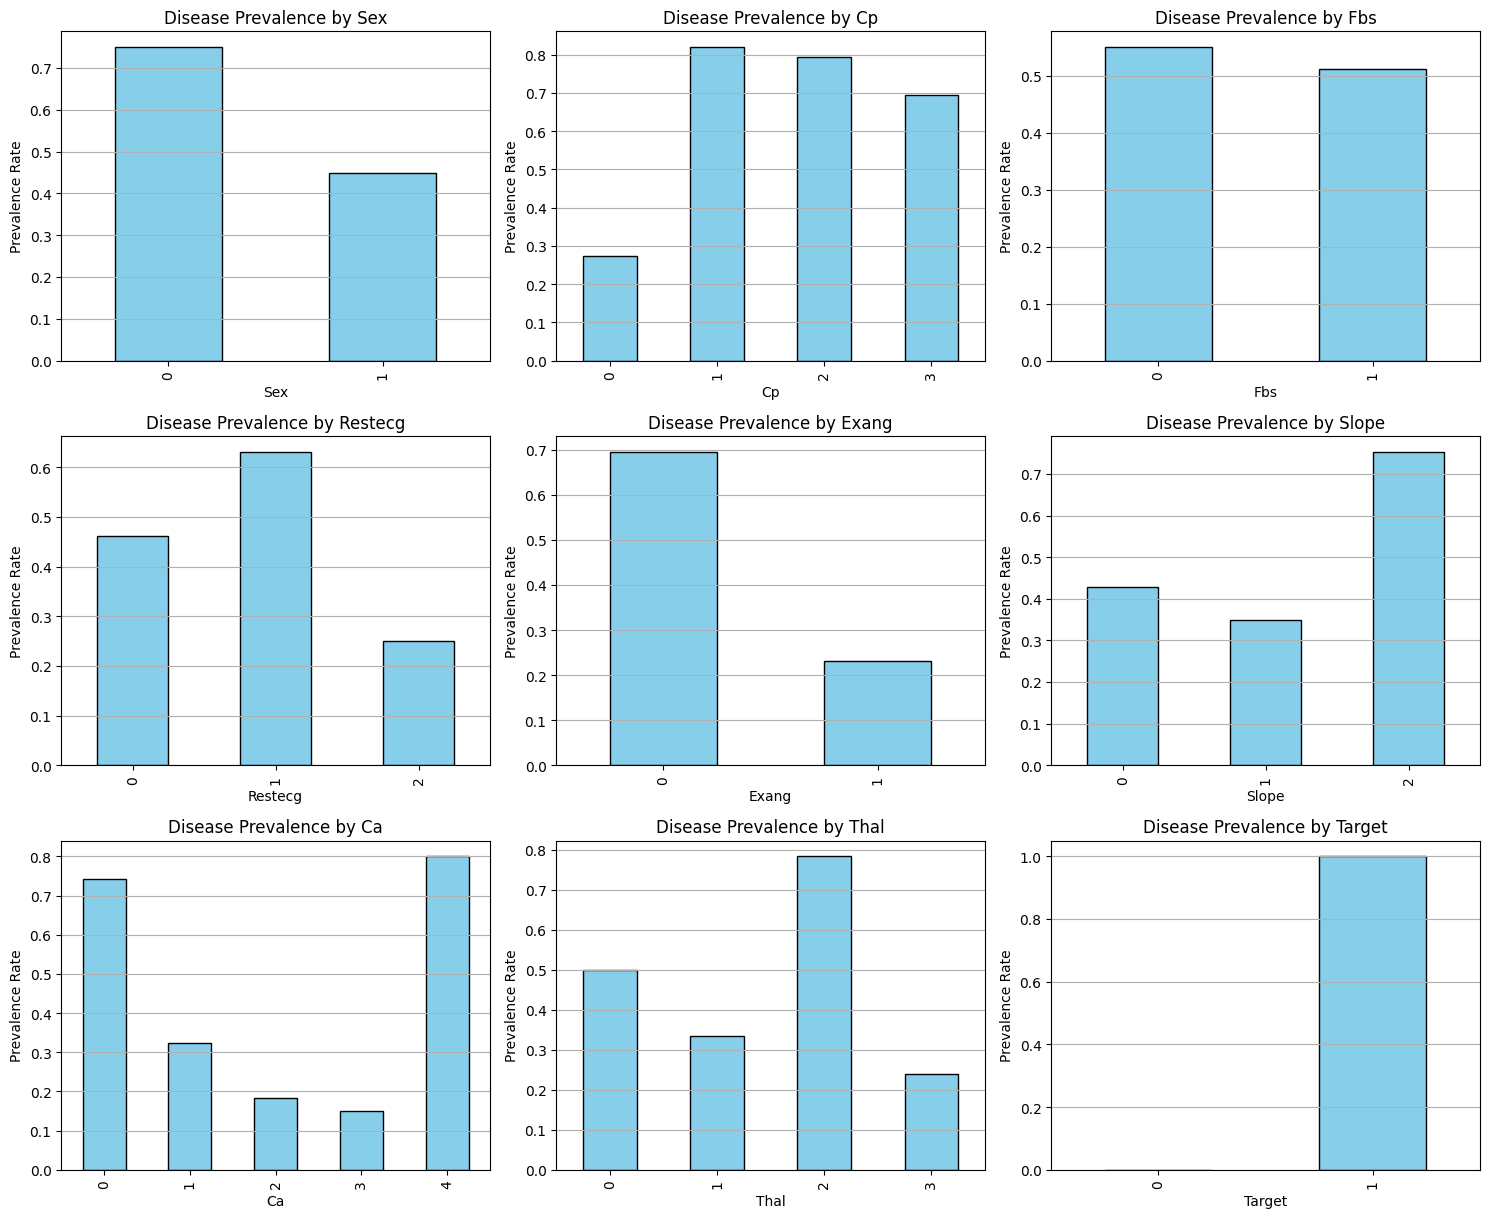

In [20]:
#define the variables to analyze wtih target variables 
variables = ['sex', 'cp', 'fbs', 'restecg',
       'exang','slope', 'ca', 'thal', 'target']
#plot bar plots for disease prevalence rates across different patient groups
plt.figure(figsize=(15,20))

for i, var in enumerate(variables, 1):
    plt.subplot(5, 3, i)
    #Calculate disease prevalence rates for each category in the variable
    prevalence_rates = df.groupby(var)['target'].mean().sort_index()

    #plot bar plot
    prevalence_rates.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Disease Prevalence by {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.grid(axis='y')
    plt.ylabel('Prevalence Rate')
    
plt.tight_layout()
plt.show()